In [0]:
from pyspark.sql.types import (StringType,StructField,
                               StructType,IntegerType,DateType,FloatType)
from pyspark.sql.functions import year

from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
%sh
rm -r /dbfs/spark_lab
mkdir /dbfs/spark_lab
wget -O /dbfs/spark_lab/2019.csv https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2019.csv
wget -O /dbfs/spark_lab/2020.csv https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2020.csv
wget -O /dbfs/spark_lab/2021.csv https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2021.csv

rm: cannot remove '/dbfs/spark_lab': No such file or directory
--2024-06-24 06:18:06--  https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122681 (120K) [text/plain]
Saving to: ‘/dbfs/spark_lab/2019.csv’

     0K .......... .......... .......... .......... .......... 41% 4.08M 0s
    50K .......... .......... .......... .......... .......... 83% 19.9M 0s
   100K .......... .........                                  100% 67.3M=0.01s

2024-06-24 06:18:06 (7.96 MB/s) - ‘/dbfs/spark_lab/2019.csv’ saved [122681/122681]

--2024-06-24 06:18:06--  https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2020.csv
Resolving raw.githubusercontent.com (raw.gith

In [0]:
# Check whether the file is downloaded
dbutils.fs.ls("/spark_lab")

[FileInfo(path='dbfs:/spark_lab/2019.csv', name='2019.csv', size=122681, modificationTime=1719209886000),
 FileInfo(path='dbfs:/spark_lab/2020.csv', name='2020.csv', size=283396, modificationTime=1719209886000),
 FileInfo(path='dbfs:/spark_lab/2021.csv', name='2021.csv', size=2869399, modificationTime=1719209887000)]

In [0]:
# Loading a single dataframe
df=spark.read.load("/spark_lab/2020.csv",format="csv")

In [0]:
display(df.limit(num=10))

_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8
SO45347,1,2020-01-01,Clarence Raji,clarence35@adventure-works.com,"Road-650 Black, 52",1,699.0982,55.9279
SO45345,1,2020-01-01,Bonnie Yuan,bonnie12@adventure-works.com,"Road-150 Red, 52",1,3578.27,286.2616
SO45348,1,2020-01-01,Leah Guo,leah14@adventure-works.com,"Road-150 Red, 44",1,3578.27,286.2616
SO45349,1,2020-01-01,Candice Sun,candice19@adventure-works.com,"Road-150 Red, 48",1,3578.27,286.2616
SO45350,1,2020-01-01,Ruben Garcia,ruben16@adventure-works.com,"Road-150 Red, 44",1,3578.27,286.2616
SO45346,1,2020-01-01,Dylan Harris,dylan43@adventure-works.com,"Road-150 Red, 48",1,3578.27,286.2616
SO45353,1,2020-01-02,Jack Zimmerman,jack24@adventure-works.com,"Road-150 Red, 62",1,3578.27,286.2616
SO45355,1,2020-01-02,Maurice Sharma,maurice10@adventure-works.com,"Road-150 Red, 48",1,3578.27,286.2616
SO45354,1,2020-01-02,Armando Dominguez,armando13@adventure-works.com,"Road-650 Black, 48",1,699.0982,55.9279
SO45356,1,2020-01-02,Douglas Suri,douglas4@adventure-works.com,"Road-150 Red, 52",1,3578.27,286.2616


In [0]:
# Loading Multiple DataFrame at once
dfall=spark.read.load(path="dbfs:/spark_lab/*.csv",format="csv")

In [0]:
display(dfall.limit(num=10))

_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8
SO49171,1,2021-01-01,Mariah Foster,mariah21@adventure-works.com,"Road-250 Black, 48",1,2181.5625,174.525
SO49172,1,2021-01-01,Brian Howard,brian23@adventure-works.com,"Road-250 Red, 44",1,2443.35,195.468
SO49173,1,2021-01-01,Linda Alvarez,linda19@adventure-works.com,"Mountain-200 Silver, 38",1,2071.4196,165.7136
SO49174,1,2021-01-01,Gina Hernandez,gina4@adventure-works.com,"Mountain-200 Silver, 42",1,2071.4196,165.7136
SO49178,1,2021-01-01,Beth Ruiz,beth4@adventure-works.com,"Road-550-W Yellow, 44",1,1000.4375,80.035
SO49179,1,2021-01-01,Evan Ward,evan13@adventure-works.com,"Road-550-W Yellow, 38",1,1000.4375,80.035
SO49175,1,2021-01-01,Margaret Guo,margaret24@adventure-works.com,"Road-250 Red, 52",1,2443.35,195.468
SO49180,1,2021-01-01,Mitchell Yuan,mitchell6@adventure-works.com,"Road-650 Black, 58",1,782.99,62.6392
SO49176,1,2021-01-01,Shawn Sharma,shawn11@adventure-works.com,"Mountain-200 Silver, 46",1,2071.4196,165.7136
SO49177,1,2021-01-01,Barbara Chande,barbara44@adventure-works.com,"Mountain-200 Silver, 42",1,2071.4196,165.7136


In [0]:
orderSchema = StructType([
     StructField("SalesOrderNumber", StringType()),
     StructField("SalesOrderLineNumber", IntegerType()),
     StructField("OrderDate", DateType()),
     StructField("CustomerName", StringType()),
     StructField("Email", StringType()),
     StructField("Item", StringType()),
     StructField("Quantity", IntegerType()),
     StructField("UnitPrice", FloatType()),
     StructField("Tax", FloatType())
])

In [0]:
df=spark.read.load(path="dbfs:/spark_lab/*.csv",format="csv",schema=orderSchema,header=False)

In [0]:
df.show(n=20)

+----------------+--------------------+----------+-------------------+--------------------+--------------------+--------+---------+--------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|       CustomerName|               Email|                Item|Quantity|UnitPrice|     Tax|
+----------------+--------------------+----------+-------------------+--------------------+--------------------+--------+---------+--------+
|         SO49171|                   1|2021-01-01|      Mariah Foster|mariah21@adventur...|  Road-250 Black, 48|       1|2181.5625| 174.525|
|         SO49172|                   1|2021-01-01|       Brian Howard|brian23@adventure...|    Road-250 Red, 44|       1|  2443.35| 195.468|
|         SO49173|                   1|2021-01-01|      Linda Alvarez|linda19@adventure...|Mountain-200 Silv...|       1|2071.4197|165.7136|
|         SO49174|                   1|2021-01-01|     Gina Hernandez|gina4@adventure-w...|Mountain-200 Silv...|       1|2071.4197|165.7136|
|         SO4

In [0]:
display(df.limit(num=20))

SalesOrderNumber,SalesOrderLineNumber,OrderDate,CustomerName,Email,Item,Quantity,UnitPrice,Tax
SO49171,1,2021-01-01,Mariah Foster,mariah21@adventure-works.com,"Road-250 Black, 48",1,2181.5625,174.525
SO49172,1,2021-01-01,Brian Howard,brian23@adventure-works.com,"Road-250 Red, 44",1,2443.35,195.468
SO49173,1,2021-01-01,Linda Alvarez,linda19@adventure-works.com,"Mountain-200 Silver, 38",1,2071.4197,165.7136
SO49174,1,2021-01-01,Gina Hernandez,gina4@adventure-works.com,"Mountain-200 Silver, 42",1,2071.4197,165.7136
SO49178,1,2021-01-01,Beth Ruiz,beth4@adventure-works.com,"Road-550-W Yellow, 44",1,1000.4375,80.035
SO49179,1,2021-01-01,Evan Ward,evan13@adventure-works.com,"Road-550-W Yellow, 38",1,1000.4375,80.035
SO49175,1,2021-01-01,Margaret Guo,margaret24@adventure-works.com,"Road-250 Red, 52",1,2443.35,195.468
SO49180,1,2021-01-01,Mitchell Yuan,mitchell6@adventure-works.com,"Road-650 Black, 58",1,782.99,62.6392
SO49176,1,2021-01-01,Shawn Sharma,shawn11@adventure-works.com,"Mountain-200 Silver, 46",1,2071.4197,165.7136
SO49177,1,2021-01-01,Barbara Chande,barbara44@adventure-works.com,"Mountain-200 Silver, 42",1,2071.4197,165.7136


In [0]:
df.printSchema()

root
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- OrderDate: date (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Item: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- UnitPrice: float (nullable = true)
 |-- Tax: float (nullable = true)



In [0]:
customers=df['CustomerName','Email']

In [0]:
print(f"Count of Customers: {customers.count()}")
print(f"Count of Distinct Customers: {customers.distinct().count()}")

Count of Customers: 32718
Count of Distinct Customers: 12427


In [0]:
print(customers.distinct())

DataFrame[CustomerName: string, Email: string]


In [0]:
customers=df['CustomerName','Email'].where(df['Item']=="Road-250 Red, 52")
print(f"Count of Customers: {customers.count()}")
print(f"Count of Distinct Customers: {customers.distinct().count()}")
print(f"Distinct Customers: {customers.distinct()}")

Count of Customers: 133
Count of Distinct Customers: 133
Distinct Customers: DataFrame[CustomerName: string, Email: string]


In [0]:
productSales=df['Item','Quantity'].groupBy("Item").sum()
display(productSales)

Item,sum(Quantity)
"Mountain-200 Black, 42",388
"Touring-1000 Yellow, 46",74
"Touring-1000 Blue, 54",67
"Short-Sleeve Classic Jersey, S",216
"Women's Mountain Shorts, S",146
"Long-Sleeve Logo Jersey, L",234
"Mountain-400-W Silver, 42",59
"Racing Socks, M",165
"Mountain-200 Silver, 42",359
"Road-750 Black, 58",170


In [0]:
yearBySales=df[year('OrderDate').alias("Year"),].groupBy("Year").count().orderBy("Year")
display(yearBySales.limit(10))

Year,count
2019,1201
2020,2733
2021,28784


In [0]:
df.createOrReplaceTempView(name="salesorders")

In [0]:
command="""
SELECT
    *
FROM 
    salesorders;
"""

sparkDF=spark.sql(sqlQuery=command)

In [0]:
display(sparkDF.limit(num=10))

SalesOrderNumber,SalesOrderLineNumber,OrderDate,CustomerName,Email,Item,Quantity,UnitPrice,Tax
SO49171,1,2021-01-01,Mariah Foster,mariah21@adventure-works.com,"Road-250 Black, 48",1,2181.5625,174.525
SO49172,1,2021-01-01,Brian Howard,brian23@adventure-works.com,"Road-250 Red, 44",1,2443.35,195.468
SO49173,1,2021-01-01,Linda Alvarez,linda19@adventure-works.com,"Mountain-200 Silver, 38",1,2071.4197,165.7136
SO49174,1,2021-01-01,Gina Hernandez,gina4@adventure-works.com,"Mountain-200 Silver, 42",1,2071.4197,165.7136
SO49178,1,2021-01-01,Beth Ruiz,beth4@adventure-works.com,"Road-550-W Yellow, 44",1,1000.4375,80.035
SO49179,1,2021-01-01,Evan Ward,evan13@adventure-works.com,"Road-550-W Yellow, 38",1,1000.4375,80.035
SO49175,1,2021-01-01,Margaret Guo,margaret24@adventure-works.com,"Road-250 Red, 52",1,2443.35,195.468
SO49180,1,2021-01-01,Mitchell Yuan,mitchell6@adventure-works.com,"Road-650 Black, 58",1,782.99,62.6392
SO49176,1,2021-01-01,Shawn Sharma,shawn11@adventure-works.com,"Mountain-200 Silver, 46",1,2071.4197,165.7136
SO49177,1,2021-01-01,Barbara Chande,barbara44@adventure-works.com,"Mountain-200 Silver, 42",1,2071.4197,165.7136


In [0]:
%sql

SELECT 
  YEAR(OrderDate) AS OrderYear,
  SUM((UnitPrice*Quantity) +  Tax) AS GrossRevenue
FROM
  salesorders
GROUP BY
  YEAR(OrderDate)
ORDER BY
  YEAR(OrderDate);

OrderYear,GrossRevenue
2019,4172169.969970703
2020,6882259.268127441
2021,1.1547835291696548E7


## Visualization

In [0]:
query="""
  SELECT 
    YEAR(OrderDate) AS OrderYear,
    SUM((UnitPrice*Quantity) +  Tax) AS GrossRevenue
  FROM
    salesorders
  GROUP BY
    YEAR(OrderDate)
  ORDER BY
    YEAR(OrderDate);
"""

dfSpark=spark.sql(sqlQuery=query)

In [0]:
dfSpark.show()

+---------+--------------------+
|OrderYear|        GrossRevenue|
+---------+--------------------+
|     2019|   4172169.969970703|
|     2020|   6882259.268127441|
|     2021|1.1547835291696548E7|
+---------+--------------------+



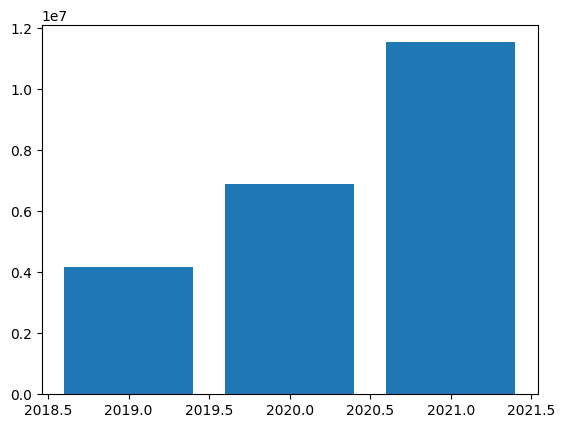

In [0]:
dfSales=dfSpark.toPandas()
plt.bar(x=dfSales['OrderYear'],height=dfSales['GrossRevenue'])
plt.show()

<Figure size 640x480 with 0 Axes>

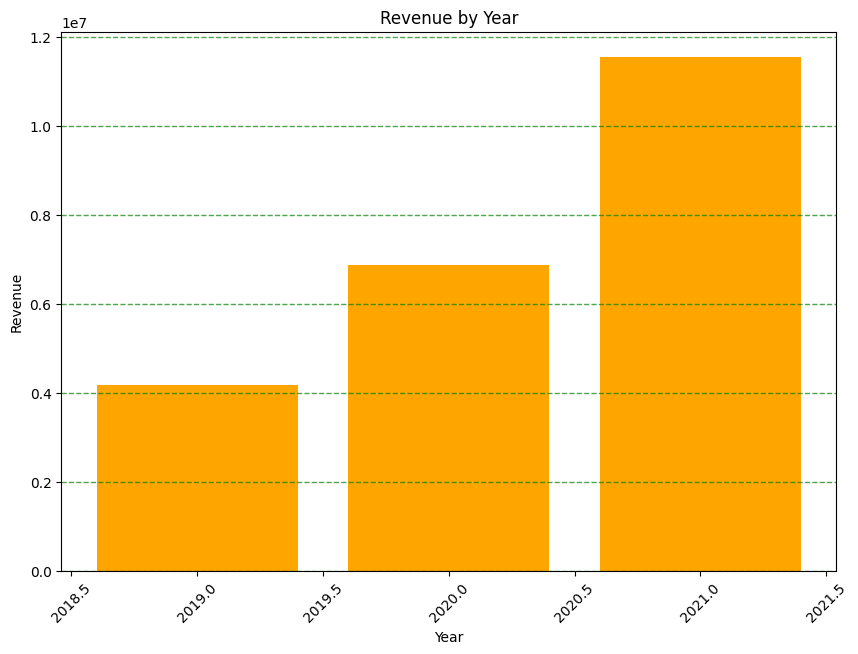

In [0]:
plt.clf()  # Clear Plot Area
plt.figure(figsize=(10,7))
plt.bar(x=dfSales['OrderYear'],height=dfSales['GrossRevenue'],color="orange")
plt.title(label="Revenue by Year")
plt.xlabel(xlabel="Year")
plt.ylabel(ylabel="Revenue")
plt.grid(color="green",linestyle="--",linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

<Figure size 640x480 with 0 Axes>

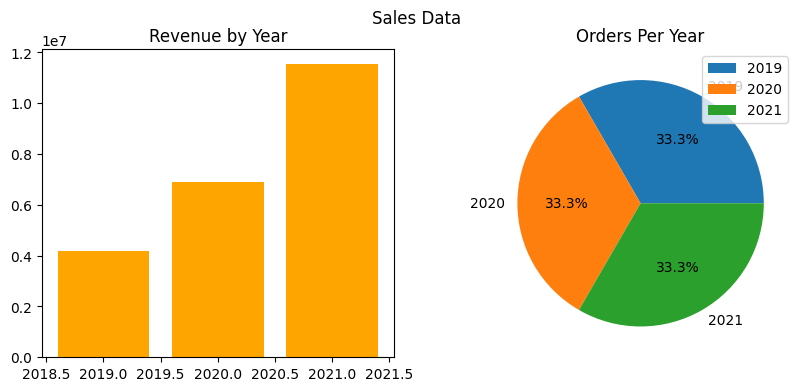

In [0]:
plt.clf()

fig, ax=plt.subplots(1,2,figsize=(10,4))

ax[0].bar(x=dfSales['OrderYear'],height=dfSales['GrossRevenue'],color="orange")
ax[0].set_title(label="Revenue by Year")

yearlyCounts=dfSales['OrderYear'].value_counts()
ax[1].pie(yearlyCounts,labels=yearlyCounts.index,autopct='%1.1f%%')
ax[1].set_title(label="Orders Per Year")
ax[1].legend(yearlyCounts.keys().tolist())

fig.suptitle('Sales Data')
plt.show()

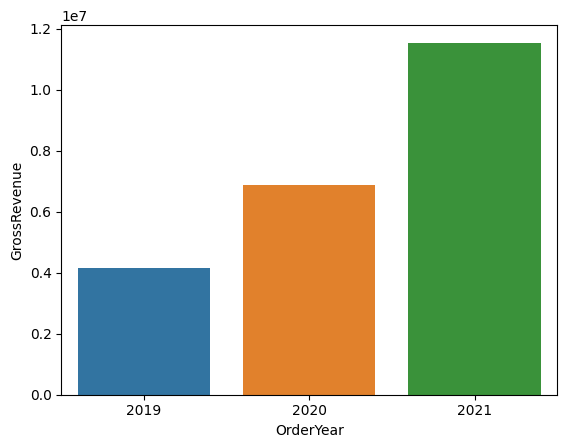

In [0]:
ax=sns.barplot(data=dfSales,x="OrderYear",y="GrossRevenue")
plt.show()

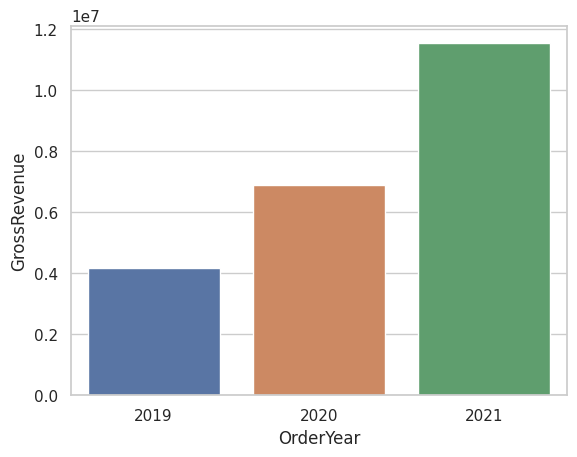

In [0]:
plt.clf()
sns.set_theme(style="whitegrid")
ax=sns.barplot(data=dfSales,x="OrderYear",y="GrossRevenue")
plt.show()

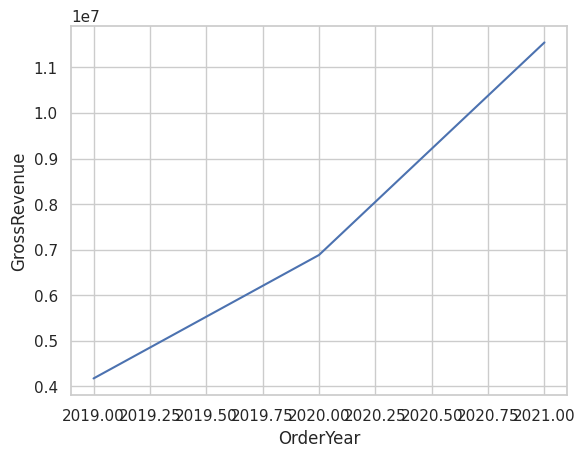

In [0]:
plt.clf()
sns.set_theme(style="whitegrid")
ax=sns.lineplot(data=dfSales,x="OrderYear",y="GrossRevenue")
plt.show()